# Desafio técnico - Felipe Pazin

Comecei importanto as Libs necessárias

In [1]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


No passo abaixo iremos carregar os arquivos:

In [2]:
df2009 = pd.read_json('https://s3.amazonaws.com/data-sprints-eng-test/data-sample_data-nyctaxi-trips-2009-json_corrigido.json', lines=True, dtype=False)
df2010 = pd.read_json('https://s3.amazonaws.com/data-sprints-eng-test/data-sample_data-nyctaxi-trips-2010-json_corrigido.json', lines=True, dtype=False)
df2011 = pd.read_json('https://s3.amazonaws.com/data-sprints-eng-test/data-sample_data-nyctaxi-trips-2011-json_corrigido.json', lines=True, dtype=False)
df2012 = pd.read_json('https://s3.amazonaws.com/data-sprints-eng-test/data-sample_data-nyctaxi-trips-2012-json_corrigido.json', lines=True, dtype=False)


Nos proximos passos iremos unificar esses arquivos JSON, para que seja uma fonte de dados unica df. Facilitará para algumas respostas.

In [121]:
#Juntando o arquivo de 2009, com 2010
df = df2009.append(df2010)

In [122]:
#Juntando o arquivo com 2009 e 2010 com 2011
df = df.append(df2011)

In [123]:
#Juntando o arquivo com 2009, 2010, 2011 com 2012
df = df.append(df2012)
#Chegando se o Append Funcionou
print('Novo DataFrame criado - df:',df.shape)

Novo DataFrame criado - df: (4000000, 17)


*   'pickup_datetime' precisa ser convertido de um objeto para data.
*   A mesma regra foi aplicada nos df2009, df2009, df2009, df2009 e df


In [6]:
df2009['pickup_datetime'] = pd.to_datetime(df2009['pickup_datetime'])
df2010['pickup_datetime'] = pd.to_datetime(df2010['pickup_datetime'])
df2011['pickup_datetime'] = pd.to_datetime(df2011['pickup_datetime'])
df2012['pickup_datetime'] = pd.to_datetime(df2012['pickup_datetime'])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [7]:
#Checando se o tipo mudou
df.dtypes.head()

vendor_id                        object
pickup_datetime     datetime64[ns, UTC]
dropoff_datetime                 object
passenger_count                   int64
trip_distance                   float64
dtype: object

Respondendo o primeiro requisito:
*   Variável 'P' recebe os registros com o nº de passageiros menor ou igual a 2.
*   Variável 'R' recebe o calculo da media dessas distancias do DataFrame 'P'. 

In [8]:
#1. Qual a distância média percorrida por viagens com no máximo 2 passageiros
P = df.loc[df['passenger_count'] <= 2]
R = P[['trip_distance']].mean()
print(f'A média por viagem com no máximo 2 passageiros é de {R[0].round(3)}')

A média percorrida por viagem com no máximo 2 passageiros é de 2.663


In [125]:
#2. Quais os 3 maiores vendors em quantidade total de dinheiro arrecadado;
V = df[['vendor_id','total_amount']].groupby('vendor_id').sum()
Vf = V.sort_values(by='total_amount', ascending=False)

#Caso "NÃO" use o GoogleCoab/Jupyter comente essa linha e descomente a proxima
display(Vf.head(3).style.format('${0:,.3f}')) 

#print(Vf.head(3))

,total_amount
vendor_id,
CMT,"$19,549,084.280"
VTS,"$19,043,434.000"
DDS,"$2,714,901.720"


In [79]:
#Preprando cenário para a questão 3
#Formatando tipo de pagamento Dinheiro
#2009
df2009['payment_type'] = df2009['payment_type'].replace('Cas','Cash')
df2009['payment_type'] = df2009['payment_type'].replace('CAS','Cash')
df2009['payment_type'] = df2009['payment_type'].replace('CASH','Cash')
df2009['payment_type'] = df2009['payment_type'].replace('CSH','Cash')
#2010
df2010['payment_type'] = df2010['payment_type'].replace('Cas','Cash')
df2010['payment_type'] = df2010['payment_type'].replace('CAS','Cash')
df2010['payment_type'] = df2010['payment_type'].replace('CASH','Cash')
df2010['payment_type'] = df2010['payment_type'].replace('CSH','Cash')
#2011
df2011['payment_type'] = df2011['payment_type'].replace('Cas','Cash')
df2011['payment_type'] = df2011['payment_type'].replace('CAS','Cash')
df2011['payment_type'] = df2011['payment_type'].replace('CASH','Cash')
df2011['payment_type'] = df2011['payment_type'].replace('CSH','Cash')
#2012
df2012['payment_type'] = df2012['payment_type'].replace('Cas','Cash')
df2012['payment_type'] = df2012['payment_type'].replace('CAS','Cash')
df2012['payment_type'] = df2012['payment_type'].replace('CASH','Cash')
df2012['payment_type'] = df2012['payment_type'].replace('CSH','Cash')
#Todos
df['payment_type'] = df['payment_type'].replace('Cas','Cash')
df['payment_type'] = df['payment_type'].replace('CAS','Cash')
df['payment_type'] = df['payment_type'].replace('CASH','Cash')
df['payment_type'] = df['payment_type'].replace('CSH','Cash')

In [98]:
#3.Faça um histograma da distribuição mensal, nos 4 anos, de corridas pagas em dinheiro

# Analise / plot de todos os anos. 
# Pl = df.loc[df["payment_type"] == "Cash"]
# Pl1 = Pl[['pickup_datetime','total_amount']]
# Pl1.plot(x='pickup_datetime',y='total_amount', figsize=(25,8))
# plt.show()

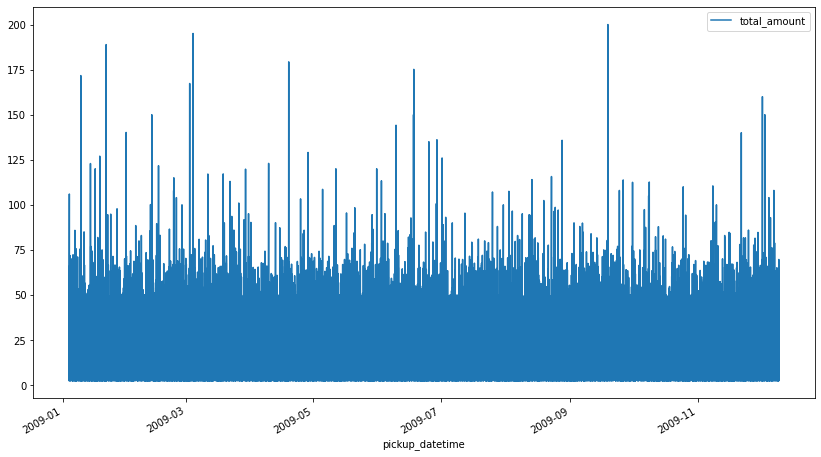

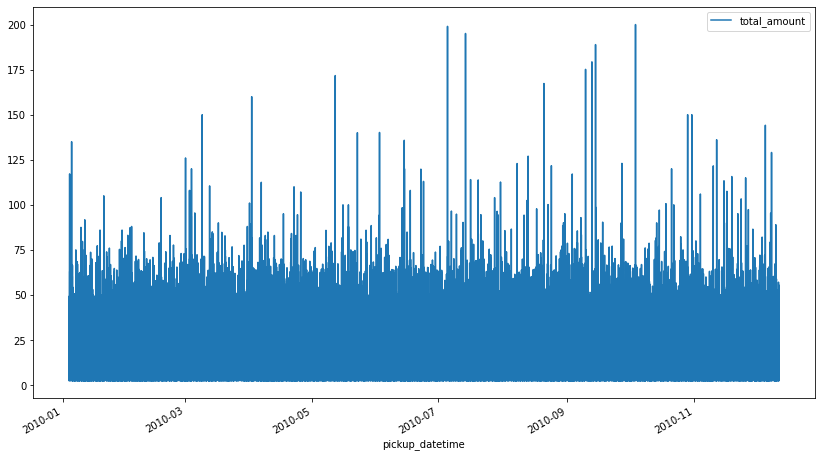

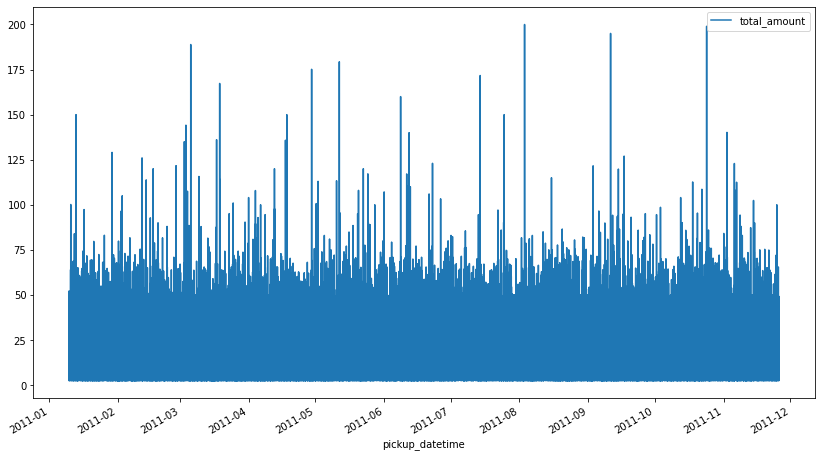

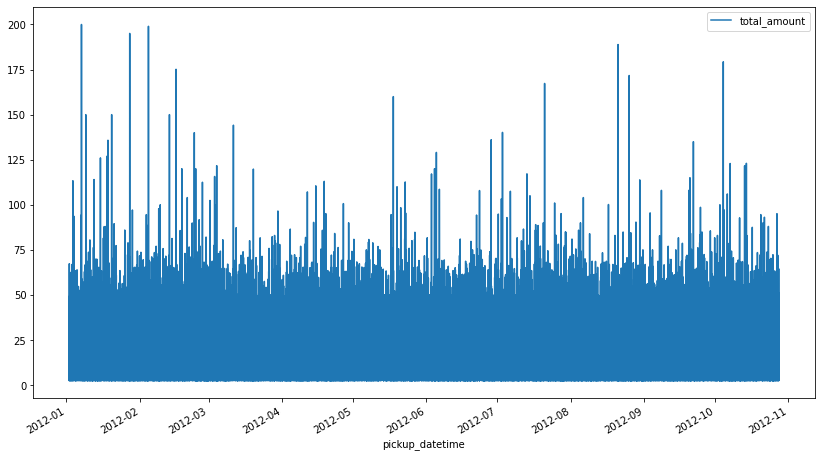

In [102]:
#3.Faça um histograma da distribuição mensal, nos 4 anos, de corridas pagas em dinheiro
Pl = df2009.loc[df2009["payment_type"] == "Cash"]               #Somente Dinheiro
Pl1 = Pl[['pickup_datetime','total_amount']]                    #Filtrando Data e Total Pago
Pl1.plot(x='pickup_datetime',y='total_amount', figsize=(14,8))  #Gráfico 

Pl = df2010.loc[df2010["payment_type"] == "Cash"]
Pl1 = Pl[['pickup_datetime','total_amount']]
Pl1.plot(x='pickup_datetime',y='total_amount', figsize=(14,8))

Pl = df2011.loc[df2011["payment_type"] == "Cash"]
Pl1 = Pl[['pickup_datetime','total_amount']]
Pl1.plot(x='pickup_datetime',y='total_amount', figsize=(14,8))

Pl = df2012.loc[df2012["payment_type"] == "Cash"]
Pl1 = Pl[['pickup_datetime','total_amount']]
Pl1.plot(x='pickup_datetime',y='total_amount', figsize=(14,8))


In [124]:
#4. Faça um gráfico de série temporal contando a quantidade de gorjetas de cada dia, nos últimos 3 meses de 2012.
Gs = df2012.loc[df2012["pickup_datetime"] >= '2012-09-01']
Gs1 = Gs[["pickup_datetime","tip_amount"]]
Gs1['pickup_datetime'] = pd.to_datetime(Gs["pickup_datetime"]).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [105]:
#Filtrando e retirando os valores igual a 0
Gs1F = Gs1.loc[Gs1["tip_amount"] != 0]

In [106]:
#Verificando se os valores foram retirados.
Gs1F.head(3)

,pickup_datetime,tip_amount
11,2012-10-17,2.0
13,2012-09-19,2.0
27,2012-10-19,2.0


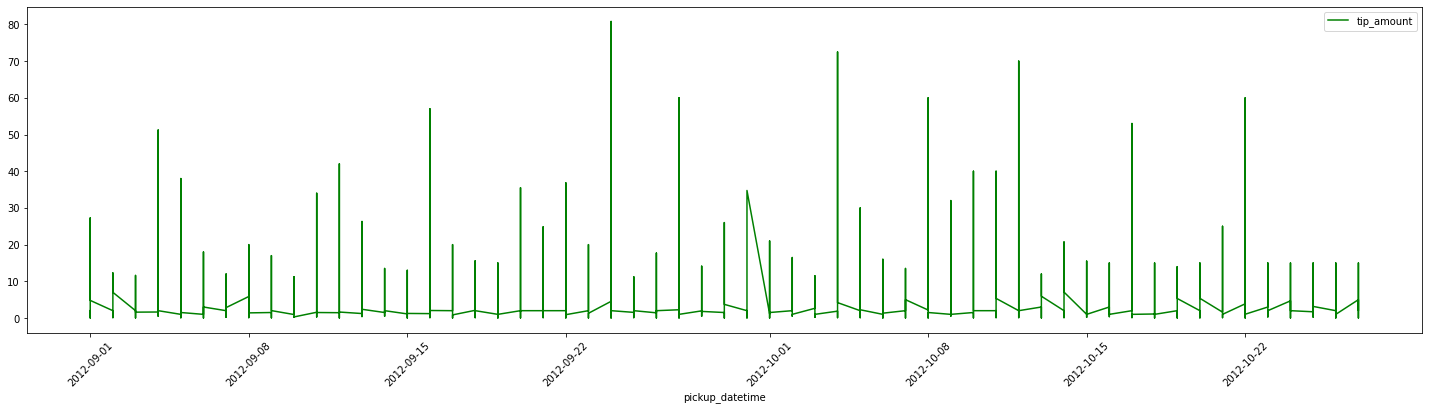

In [107]:
#Grafico / Resposta do requisito 4
Gs1F.set_index(['pickup_datetime'], inplace=True)
Gs1F.plot(figsize=(25,6), color = 'green', label="Valores")
plt.xticks(rotation=45)
plt.show()

# Bonus 1

In [115]:
#Bônus 1 - Qual o tempo médio das corridas nos dias de sábado e domingo
#Formatando o tipo da coluna com a data e tempo
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
dfTime = df[['pickup_datetime','dropoff_datetime']]
#Nova serie com o calculo dos tempos das viagens (Final - Inicial)
difTime = df['dropoff_datetime'] - df['pickup_datetime']
#Novo DF somente com os tempos
df4 = df[['pickup_datetime', 'dropoff_datetime']]
#Adicionando o "tempo" ao novo DF
df4.insert(2, "travel_time", difTime, allow_duplicates=True)
df4.head(3)

,pickup_datetime,dropoff_datetime,travel_time
0,2009-04-21 18:51:11.767205+00:00,2009-04-21 18:57:09.433767+00:00,0 days 00:05:57.666562
1,2009-01-13 07:40:07.639754+00:00,2009-01-13 07:50:36.386011+00:00,0 days 00:10:28.746257
2,2009-01-06 19:30:44.142187+00:00,2009-01-06 19:43:09.908429+00:00,0 days 00:12:25.766242


In [116]:
#Novo DF separando a data DDMMAAAA para classificar os dias da semana
DF5 = pd.to_datetime(df['pickup_datetime'].dt.date)
#Criando e convertendo a data em dia da semana
Dw = DF5.dt.dayofweek
df4.insert(3, "day_week", Dw, allow_duplicates=True)
df4.head(3)

,pickup_datetime,dropoff_datetime,travel_time,day_week
0,2009-04-21 18:51:11.767205+00:00,2009-04-21 18:57:09.433767+00:00,0 days 00:05:57.666562,1
1,2009-01-13 07:40:07.639754+00:00,2009-01-13 07:50:36.386011+00:00,0 days 00:10:28.746257,1
2,2009-01-06 19:30:44.142187+00:00,2009-01-06 19:43:09.908429+00:00,0 days 00:12:25.766242,1


In [95]:
#Filtrar somente os dias 5 e 6 (Sábado e domingo)
S_D = df4.loc[df4['day_week'] >= 5]
#Calculando a média - Resposta do Bonus 1
T = S_D['travel_time'].mean()
print(f'O tempo médio de cada viagem foi de {T}')

O tempo médio de cada viagem foi de 0 days 00:08:44.790923171


# Bonus 2 - Não consegui montar o ambiente do GeoPandas




In [96]:
#Bonus 2 - Fazer uma visualização em mapa com latitude e longitude de pickups and dropoffs no ano de 2010;

#Separando as coordenadas em um novo DataFrame
dfG = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
dfG.shape

(4000000, 4)

In [26]:
#Checando o conteúdo
dfG.head(3)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-74.004114,40.742950,-73.994712,40.747950
1,-73.996506,40.747784,-73.940449,40.792385
2,-73.951340,40.752070,-73.944535,40.768108


#Bonus 3

# Bonus 4

https://aws.amazon.com/pt/elasticbeanstalk/